<a href="https://colab.research.google.com/github/SUNITHA123-THUMMA/Form-validations-/blob/main/Copy_of_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
#drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [2]:
import os
root_path = 'gdrive/My Drive/' #MINI FINAL'
print(os.getcwd())
os.chdir(root_path)
!ls

/content
'Colab Notebooks'   DISPLAY	  jungkook  'MINI FINAL'     RVC
 DataSet	    G_24000.pth   kksDocs    Mini-Projecet


In [3]:
print(os.getcwd())

/content/gdrive/MyDrive


# Import Library

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, save_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers as rg
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import backend as K
import numpy.random as rng
import random

from matplotlib import pyplot as plt
import numpy as np
#from datagenerator  import DataGenerator # train query set generator
import tensorflow as tf
from keras.utils import np_utils
import tensorflow

There are Basically three parts in this workspace.
    

1.   Data preparation
2.   Sample/episodes generation
3.   Model training 
    

1. Data preparation   

--.   Unzip image files
--.   Read each folder (language) then each folder (alphabets) then each character , resize, reshape it and put on array form.



# Data/sample generation

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
#from scipy.misc import imresize
import cv2

In [6]:
path1 = "DataSet"
folders_list = os.listdir(path1)
print("folder1:",folders_list)
folders_list.sort()


          

folder1: ['LGG', 'HGG']


In [10]:
i=1
for folder in tqdm(folders_list): 
        path1 = os.path.join(path, folder)
        print(folder,'-',i,':',len(os.listdir(path1)))  

100%|██████████| 2/2 [00:00<00:00, 98.44it/s]

HGG - 1 : 269
LGG - 1 : 76


# Load Data

In [8]:
def loader(path): 
    sample_train = [];sample_val = [];sample_test = []
    label1 = [] ;label2 = [] ;label3 = []    
    
    folders_list = os.listdir(path)
    print("folder1:",len(folders_list))
    folders_list.sort()
    count = 0;i=0; center=(50,50); scale=1.0;

    for folder in tqdm(folders_list): 
         path1 = os.path.join(path, folder)
         print(folder,'-',i,':',len(os.listdir(path1)))                      
         try:
                                    
            for image_name in os.listdir(path1):
              sample_images=[]  
              for image_name1 in sorted(os.listdir(path1+"/"+image_name)):
                path2=os.path.join(path1+"/"+image_name+"/", image_name1)
                image = cv2.imread(path2,0)/255 
                #print(str(i)+":"+ path2+"\n", end = '')                          
                sample_images += [image]
                if(folder=='HGG'):
                  l=0
                else:
                  l=1
              if(i<180 or( i>259 and i<300)):
                label1.append(l)
                sample_train.append(sample_images)
              if((i>180  and i<220) or( i>300 and i<320)):
                label2.append(l)
                sample_val.append(sample_images)
              if((i>220  and i<259) or i>320):
                label3.append(l)
                sample_test.append(sample_images)
              i+=1
              #print("\n")
         except NotADirectoryError:
              print(f"Cannot load from {path1}")
    
        
    print("count:",count)
    return sample_train,sample_val,sample_test, label1,label2,label3



In [14]:
path="DataSet"
sample_train,sample_val,sample_test, label1,label2,label3 = loader(path)

print(np.array(sample_train).shape)
#print(np.array(Label).shape)





folder1: 2


  0%|          | 0/2 [00:00<?, ?it/s]

HGG - 0 : 269


 50%|█████     | 1/2 [05:42<05:42, 342.59s/it]

LGG - 269 : 76


100%|██████████| 2/2 [09:48<00:00, 294.02s/it]

count: 0
(220,)



<ipython-input-14-4eb27bc825f1>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(sample_train).shape)


In [16]:
x=[] #np.zeros((345,15,231,231,3))
for i in range (345):
  x.append(list(Sample[i]))

print(np.array(x).shape)

NameError: ignored

In [ ]:
np.array(Sample[1]).shape

(15, 231, 231)

In [ ]:
Label

In [17]:
sampleData=np.array(Sample[1]).astype('float32')/255
x_train1=sampleData[:200]; y_train1 = Label[:200]

print(x_train1.shape, len(y_train1))
#.....................................................................
x_val1=sampleData[200:]; y_val1 = Label[200:]

print(x_val1.shape, len(y_val1))

NameError: ignored

# Episode Generation 

In [ ]:
import random
train_way = 5
val_way = 5
query =1
shot = 3

#indexx = random.sample(list(y_train), train_way ) 
def blur(img):
  img=np.reshape(img, (100,100,3))
  img2= cv2.GaussianBlur(img,(3,3),0)
  return img2
def flip (img):  
  img=np.reshape(img, (100,100,3))
  img2= cv2.flip(img, 1)
  return img2 #np.expand_dims(img2, axis=-1)

def contrast(img):    
    g=random.sample([1.2,0.8], 1) 
    return img**g
    
class Data_GeneratorFace(tf.keras.utils.Sequence):
    'Generates data for Keras'
    #def __init__(self, datatype='train', dim=(32,32), n_channels=1, way=20, shot=1, query=1, num_batch=10):
    def __init__(self, datatype='train', dim=(28,28), n_channels=1, way=20,vway=20, shot=1, query=1, num_batch=10):
        'Initialization'
        self.data=x_train1
        self.y=y_train1
        if(datatype=='val'):
          self.data=x_val1
          self.y=y_val1
        if(datatype=='test'):
          self.data=x_test1
          self.y=y_test1
        self.dim = dim
        self.n_channels = n_channels
        #print(num_per_class)
        self.num_batch = num_batch
        self.n_classes = len(self.data)
        self.on_epoch_end()
        self.way = way
        self.vway = vway
        self.shot = shot
        self.query = query        

    def __len__(self):
        'Denotes the number of batches per epoch'
        return self.num_batch
    def __getitem__(self,index):
        'Generate one batch of data'
        X_sample, X_query, label = self.__data_generation()
        return [X_sample, X_query], label

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

    def __data_generation(self):
        n_classes=np.unique(self.y)       
        X_sample = []; #np.empty((way, shot, *dim))
        X_query = [] #np.empty((way, query, *dim))    
        label = np.zeros((self.vway*self.query,self.way))
        #label = -0.001*np.ones((self.way*self.query,self.way))
        idx = random.sample(list(n_classes), self.way+1) 
        index1 = [np.where(self.y == i)[0] for i in idx]

        for i in range(self.way):
            X_temp = []; #L=len(list(index1[i]));       if(L<self.shot):print(list(index1[i]))
            sample_idx1 = random.sample(list(index1[i]), self.shot)
            for s in range(self.shot):
              img= self.data[sample_idx1[s]]
              im=[img,flip(img),img**0.8,img**1.2]
              r1=random.sample([0,1,2,3],1)[0]
              X_temp+= [im[r1]] 
              #X_temp+= [contrast(img)]            
            X_sample.append(X_temp)
  
        idx2 =np.arange(self.way); np.random.shuffle(idx2)
         
        for j in range(self.vway):   
              X_tempp = []; z=1;k=k1=idx2[j]; p= random.sample([0,1],1)[0] 
              if(self.way==1 and p==1):
                z=0; k1=1;               
              sample_idx2 = random.sample(list(index1[k1]), self.query) 
              for q in range(self.query):                
                  img=self.data[sample_idx2[q]]
                  im=[img,flip(img),img**0.8,img**1.2]
                  r=random.sample([0,1,2,3],1)[0]
                  #X_tempp+= [img] 
                  X_tempp+= [im[r]]                 
                  X_query.append(X_tempp)            
                  label[j*self.query+q,k]= z  
                  #label[j,idx2[j]]= 1   
              #X_query.append(X_temp)  
        return np.array(X_sample), np.array(X_query), np.reshape(np.diag(label),(-1,1))
        
       
train_loader = Data_GeneratorFace(way=train_way,vway=val_way,datatype='train',query=query, shot=shot, num_batch=100)
val_loader = Data_GeneratorFace(way=train_way,vway=val_way, datatype='val',query=query, shot=shot, num_batch=100)
(x,y),z=train_loader[0]
print(x.shape,y.shape,z.shape)   
print(z)    
       


(x,y),z=train_loader[0]
print(z, y[1,0].shape)
val_way=5
fig, axs = plt.subplots(val_way, 3)

for i in range(val_way):
     axs[i, 0].imshow(x[i,0],cmap="gray_r")
     axs[i, 1].imshow(x[i,1],cmap="gray_r")
     axs[i, 2].imshow(y[i,0],cmap="gray_r")



# Episode Generation new

In [ ]:
x_test=df['images']; y_test = df['labels']
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape, y_test.shape)

class Data_GeneratorRavi(tf.keras.utils.Sequence):
    'Generates data for Keras'
    #def __init__(self, datatype='train', dim=(32,32), n_channels=1, way=20, shot=1, query=1, num_batch=10):
    def __init__(self, datatype='train', dim=(28,28),num_per_class=1, n_channels=1, way=20,vway=20, shot=1, query=1, num_batch=10):
        'Initialization'
        self.data=x_train
        self.y=y_train
        if(datatype=='val'):
          self.data=x_val
          self.y=y_val
        if(datatype=='test'):
          self.data=x_test
          self.y=y_test
        self.dim = dim
        self.n_channels = n_channels
        #print(num_per_class)
        self.num_batch = num_batch
        self.n_classes = len(self.data)
        self.on_epoch_end()
        self.way = way
        self.vway = vway
        self.shot = shot
        self.query = 1         

    def __len__(self):
        'Denotes the number of batches per epoch'
        return self.num_batch
    def __getitem__(self,index):
        'Generate one batch of data'
        X_sample, X_query, label = self.__data_generation()
        return [X_sample, X_query], label

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

    def __data_generation(self):
        n_classes=np.unique(self.y)       
        X_sample = []; #np.empty((way, shot, *dim))
        X_query = [] #np.empty((way, query, *dim))    
        label = np.zeros((self.way*self.query,self.way))
        idx = random.sample(list(n_classes), self.way) 
        index1 = [np.where(self.y == i)[0] for i in idx]

        for i in range(self.way):
            X_temp = []
            sample_idx1 = random.sample(list(index1[i]), self.shot)
            for s in range(self.shot):
              X_temp+= [self.data[sample_idx1[s]]]
            X_sample.append(X_temp)
  
        idx2 =np.arange(self.way); np.random.shuffle(idx2)
                           
        for j in range(self.vway):   
            X_temp = [];  
            sample_idx2 = random.sample(list(index1[idx2[j]]), self.query) 
            for q in range(self.query):
              X_temp+= [self.data[sample_idx2[q]]]              
              #k=np.argwhere(index1 == idx2[j])
              label[j,idx2[j]]= 1   
            X_query.append(X_temp) 
            
        if (self.vway<self.way):
          k = random.sample(list(idx2), 1) 
          sample_idx2 = random.sample(list(index1[k[0]]), self.query)       
          for j in range( self.vway,self.way):    
              X_query.append([self.data[sample_idx2[0]]])
              label[j,k]= 1 
       
        return np.array(X_sample), np.array(X_query), label
        
       

NameError: ignored

In [ ]:
idx2 =np.arange(5);
k = random.sample(list(idx2), 1) 
print(k[0])
 

3


# 3. Model Initialization 

---



In [ ]:

lr = 0.001
eps = 1e-12

def W_init(shape,name=None):
    """Initialize weights as in paper"""
    values = rng.normal(loc=0,scale=1e-2,size=shape)
    return K.variable(values,name=name)

def b_init(shape,name=None):
    """Initialize bias as in paper"""
    values=rng.normal(loc=0.5,scale=1e-2,size=shape)
    return K.variable(values,name=name)

#build convnet to use in each siamese 'leg'
def conv_net(dim):
    convnet = Sequential()	  
    for i in range(4):
        convnet.add(Conv2D(64,(3,3),padding='same',input_shape=dim))
        convnet.add(BatchNormalization())
        convnet.add(Activation('relu'))
        convnet.add(MaxPooling2D())
    convnet.add(Flatten())
    return convnet

	
def proto_dist(x):  # Negative softmax distance measure
    feature, pred = x
    pred_dist = tf.reduce_sum(pred ** 2, axis=1, keepdims=True)
    feature_dist = tf.reduce_sum(feature ** 2, axis=1, keepdims=True)
    #print(pred_dist.shape);  print(feature_dist.shape)
    dot = tf.matmul(pred, tf.transpose(feature))
    #print(dot.shape)
    return tf.nn.softmax(-(tf.sqrt(pred_dist + tf.transpose(feature_dist) - 2 * dot)))	

def radialBasis_dist1(x):  # Radial Basis
    feature, pred = x; 
    pred_dist = tf.reduce_sum(pred ** 2, axis=1, keepdims=True)
    feature_dist = tf.reduce_sum(feature ** 2, axis=1, keepdims=True)
    #print(pred_dist.shape);  print(feature_dist.shape)
    dot = tf.matmul(pred, tf.transpose(feature))
    dist=pred_dist + tf.transpose(feature_dist) - 2 * dot
    return tf.exp(-(dist/(2*25)))

def poly_dist2(x):
  xm, yy = x
  #yyy=xm-yy
  zz=tf.matmul(yy, tf.transpose(xm)) +1
  P = zz #*zz #tf.matmul(zz,tf.transpose(zz))
  return tf.nn.softmax((P))

def reduce_tensor(x):
    y=tf.reduce_mean(x, axis=1)
    return y


def reshape_query(x):  # reshape query output to  dimention 64*query,1
    y=tf.reshape(x, [-1, tf.shape(x)[-1]]) 
    return y  

def conv_net80(dim):
    f=64
    convnet = Sequential()	  
    for i in range(4):
        if(i==2):
          f=80
        convnet.add(Conv2D(f,(3,3),padding='same',input_shape=dim))
        #convnet.add(Dropout(0.1))
        convnet.add(BatchNormalization())
        convnet.add(Activation('relu'))
        convnet.add(MaxPooling2D())                
    convnet.add(Flatten())
    return convnet

def normalise(xx):
   
    std = tf.reshape(tf.math.reduce_std(xx,axis=1),(1,-1))
    meanFeature = tf.reshape(tf.reduce_mean(xx,axis=1),(1,-1))  
    out_feature = tf.transpose((tf.transpose(xx)- meanFeature)/std)    
    return out_feature


def Dev_net2(dim):    
    model = Sequential()
    model.add(Conv2D(filters=train_way, kernel_size=(3,1),padding='same', activation='relu', input_shape=dim))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=train_way, kernel_size=(3,1),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=1, kernel_size=(3,1), padding='same', activation='sigmoid')) 
    return model

def Bias_net1(dim):    
    model = Sequential()
    model.add(Conv2D(filters = 3*train_way, kernel_size =(3,1),padding ='same', activation ='linear', input_shape = dim))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = train_way, kernel_size =(3,1),padding ='same', activation ='linear')) 
    model.add(Conv2D(filters = 1, kernel_size =(3,1), padding ='same', activation='linear'))  
    model.add(BatchNormalization())     
    return model

def Bias_net2(dim):    
    model = Sequential()
    model.add(Conv2D(filters = 3*train_way, kernel_size =(3,1),padding ='same', activation ='linear', input_shape = dim))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = train_way, kernel_size =(3,1),padding ='same', activation ='linear')) 
    model.add(Conv2D(filters = 1, kernel_size =(3,1), padding ='same', activation='linear'))  
    model.add(BatchNormalization())     
    return model




In [ ]:
train_way = 5
val_way = 5
query = 1
channels=1
shot = 5
n=80
#train_loader=data_generation(way,shot,query,dim,channels,x_train)
#val_loader=data_generation(way,shot,query,dim,channels,x_test)
train_loader = Data_GeneratorRavi(way=train_way,vway=val_way,datatype='train',num_per_class=n,query=query, shot=shot, num_batch=100)
val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='val',num_per_class=n, shot=shot, num_batch=100)
(x,y),z=train_loader[0]
print(x.shape,y.shape,z.shape)
(x1,y1),z1=val_loader[0]
print(x1.shape,y1.shape,z1.shape)
print(len(train_loader))

(5, 5, 28, 28, 1) (5, 1, 28, 28, 1) (5, 5)
(5, 5, 28, 28, 1) (5, 1, 28, 28, 1) (5, 5)
100


In [ ]:
(x,y),z=train_loader[5]
z

#ProtoNet Model Traning

###  ProtoNet 5-5

In [ ]:
train_way = 5
val_way = 5
query = 1
shot = 1
n=80
lr=0.001
dim=(28,28,1)
history3=[]
from tensorflow.keras import callbacks as cb

def scheduler(epoch):
    global lr
    print( epoch ,":lr:",lr)
    if epoch %10 == 0:   
        lr/= 1.1
    return lr

class SaveConv(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            save_model(conv, f"model/proto_omniglot_conv_{epoch}_{shot}_{val_way}")

if __name__ == "__main__":
    conv = conv_net(dim)
    conv_5d = TimeDistributed(conv)
    input_shape = (None,28,28,1)
    sample = Input(input_shape)
    out_feature = conv_5d(sample)
    out_feature = Lambda(reduce_tensor)(out_feature)
    inp = Input(input_shape)
    map_feature = conv_5d(inp)
    map_feature = Lambda(reshape_query)(map_feature)
    pred = Lambda(proto_dist)([out_feature, map_feature]) #negative distance
    combine1 = Model([sample, inp], pred)
    optimizer = Adam(0.001)
    combine1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    print(combine1.summary())

 #.........................................................................................
    train_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='train',num_per_class=n,query=query, shot=shot, num_batch=200)
    val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='val',num_per_class=n, shot=shot, num_batch=100)
    save_conv = SaveConv()
    reduce_lr = cb.ReduceLROnPlateau(monitor='val_loss', factor=0.4,patience=2, min_lr=1e-8)
    lr_sched = cb.LearningRateScheduler(scheduler)
    tensorboard = cb.TensorBoard()

    history3=combine1.fit_generator(train_loader,epochs=150,validation_data=val_loader, use_multiprocessing=True, workers=4, shuffle=False, callbacks=[save_conv, lr_sched, tensorboard])

combine1.save("Model/ProtoNet_Omniglot_5_1.h5")
#np.save('Model/PtotoNet_Omniglot_5_5.npy',history3.history)

#combine1.save("Model/ProtoNet_Omniglot_5_5_1000_1.1.h5")
#np.save('Model/ProtoNet_Omniglot_5_5_1000_1.1.npy',history3.history)
    

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 28, 2  0           []                               
                                8, 1)]                                                            
                                                                                                  
 input_6 (InputLayer)           [(None, None, 28, 2  0           []                               
                                8, 1)]                                                            
                                                                                                  
 time_distributed_2 (TimeDistri  (None, None, 64)    112448      ['input_5[0][0]',                
 buted)                                                           'input_6[0][0]']          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


196/200 [============================>.] - ETA: 0s - loss: 0.5878 - categorical_accuracy: 0.7888WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
INFO:tensorflow:Assets written to: model/proto_omniglot_conv_0_1_5/assets
200/200 [==============================] - 8s 30ms/step - loss: 0.5825 - categorical_accuracy: 0.7910 - val_loss: nan - val_categorical_accuracy: 0.8020 - lr: 9.0909e-04
1 :lr: 0.0009090909090909091
Epoch 2/150
200/200 [==============================] - 4s 20ms/step - loss: 0.3017 - categorical_accuracy: 0.9100 - val_loss: nan - val_categorical_accuracy: 0.8660 - lr: 9.0909e-04
2 :lr: 0.0009090909090909091
Epoch 3/150
200/200 [==============================] - 4s 20ms/step - loss: 0.2927 - categorical_accuracy: 0.9170 - val_loss: nan - val_categorical_accuracy: 0.8560 - lr: 9.0909e-04
3 :lr: 0.0009090909090909091
Epoch 4/150
200/200 [==================

In [ ]:
#combine1.save('Model/Proto_Omniglot_5_5_1000_1.1.h5')   

train_way =5
val_way = 5
query = 1
shot = 5
result=[]

#m3=load_model('Model/Regress_euclid_Omniglot_5_5_1000_1.1.h5')
m3=load_model('Model/Proto_Omniglot_5_5_1000_1.1.h5')
val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='test', num_per_class=n,shot=shot, num_batch=100)

(x1,y1),z1=val_loader[0]
print(x1.shape,y1.shape,z1.shape)
result=m3.evaluate(val_loader)



In [ ]:
combine1.save("Model/ProtoNet_Omniglot_5_5_1000_1.1.h5")
np.save('Model/ProtoNet_Omniglot_5_5_1000_1.1.npy',history3.history)

In [ ]:
val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='test', num_per_class=n,shot=shot, num_batch=100)
result=combine1.evaluate(val_loader)

100/100 [==============================] - 1s 5ms/step - loss: 0.2101 - categorical_accuracy: 0.9355


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


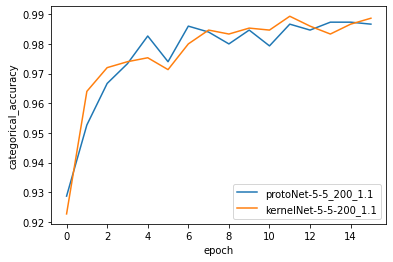

In [ ]:
#history1=history4
def smooth (h):
  hh=[]; b=3; L=int(len(h)/b)
  for i in range(L):
    hh.append(np.mean(h[i*b:i*b+b]))
  hh.append(np.mean(h[L*b+b:])) # append rest
  return hh
metric="categorical_accuracy"
plt.plot(smooth(history1.history["val_" + metric]))
plt.plot(smooth(history4.history["val_" + metric]))

plt.legend([ "protoNet-5-5_200_1.1","kernelNet-5-5-200_1.1","protoNet-5-5_1000_1.3"], loc="lower right")



plt.ylabel(metric)
plt.xlabel("epoch")
plt.show()


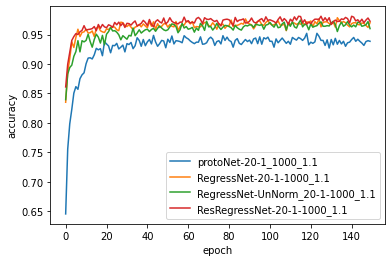

In [ ]:

history1=np.load('Model/PtotoNet_Omniglot_20_1.npy',allow_pickle='TRUE').item()
history2=np.load('Model/Regress_euclid_Omniglot_20_1_1000_1.1.npy',allow_pickle='TRUE').item()
history3=np.load('Model/Regress_euclid_unNorm_Omniglot_20_1_1000_1.1.npy',allow_pickle='TRUE').item()
history4=np.load('Model/Regress_euclid_Res_Omniglot_20_1_1000_1.1.npy',allow_pickle='TRUE').item()

def smooth (h):
  hh=[]; b=3; L=int(len(h)/b)
  for i in range(L):
    hh.append(np.mean(h[i*b:i*b+b]))
  hh.append(np.mean(h[L*b+b:])) # append rest
  return hh
metric="accuracy"
plt.plot(history1["val_categorical_" + metric])
plt.plot(history2["val_" + metric])
plt.plot(history3["val_" + metric])
plt.plot(history4["val_" + metric])
plt.legend([ "protoNet-20-1_1000_1.1","RegressNet-20-1-1000_1.1","RegressNet-UnNorm_20-1-1000_1.1","ResRegressNet-20-1-1000_1.1",], loc="lower right")

plt.ylabel(metric)
plt.xlabel("epoch")
plt.show()